### Name of the Student: Nicholas Furi

### Predict winner soccer games: Models 

- In this notebook two things are being done:
    - Feature Engineering such as:
        - Variable that keep track of how each team performed in the pass against each opponent. The variable is a winning percentage ratio
        - For each soccer stats are calculated rolling averages with a lag of 3 games
        - Changing location of the Betting Odds
        - Codifying and binarizing columns
    - Fitting the dataset in the following models:
        - Logistic Regression
        - KNN
        - SVM
        - Decision Trees
        - Random Forest
        - XGBoost
        - Naive Bayes
    
The models run have all the same goal, predict the winner of each game of the league. 

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
pd.set_option('display.max_columns', None)


In [6]:
df1 = pd.read_csv("CSV Campionati/df1.csv")

### Creating a historical performance of each team
- The goal of this variable is to keep track of how each team perform against each opponent team. There are always teams that historical perform bad against other teams. The idea is to try to give that type of data to the models.
- In order to create this feature the following steps have been made:
     - 1.1 Create a nested for loop with each team and opponents
     - 1.2 With the function loc, create seperate dataframes for each unique combination
     - 1.3 In the third loop the winning percentage is being calculated, and append each calculation into a list
     - 1.4 To notice that the append results shift of 1 row, this because is not possible to feed the models data of the present but only of the past.
     - 1.5 Append each unique dataframe created all to another dataframe

In [8]:
import warnings
warnings.filterwarnings('ignore')

teams = ['Lazio', 'Bologna', 'Verona', 'Roma', 'Empoli', 'Chievo',
       'Fiorentina', 'Milan', 'Frosinone', 'Torino', 'Inter', 'Atalanta',
       'Juventus', 'Udinese', 'Palermo', 'Genoa', 'Sampdoria', 'Carpi',
       'Sassuolo', 'Napoli', 'Crotone', 'Cagliari', 'Pescara', 'Spal',
       'Benevento', 'Parma', 'Brescia', 'Lecce', 'Spezia', 'Salernitana',
       'Venezia', 'Monza', 'Cremonese']
opponents = ['Bologna', 'Lazio', 'Roma', 'Verona', 'Chievo', 'Empoli', 'Milan',
       'Fiorentina', 'Torino', 'Frosinone', 'Atalanta', 'Inter',
       'Udinese', 'Juventus', 'Genoa', 'Palermo', 'Carpi', 'Sampdoria',
       'Napoli', 'Sassuolo', 'Crotone', 'Cagliari', 'Pescara', 'Spal',
       'Benevento', 'Parma', 'Brescia', 'Lecce', 'Spezia', 'Salernitana',
       'Venezia', 'Monza', 'Cremonese']
data1= pd.DataFrame()

# 1.1
for team in teams:
    for opponent in opponents:
        if team == opponent:
            continue
        elif team != opponent:
            #1.2
            fd1 = df1.loc[(df1['Team'] == team) & (df1['Opponent'] == opponent)]
            rs = []
            count_games = 0
            count_win = 0
            #1.3
            for i in fd1.index:
                count_games += 1
                if fd1['new_FTR'][i] == 'W':
                    count_win += 1
                    perc = (count_win/count_games)
                    rs.append(perc)
                elif fd1['new_FTR'][i] == 'L':
                    perc = (count_win/count_games)
                    rs.append(perc)
                elif fd1['new_FTR'][i] == 'D':
                    perc = (count_win/count_games)
                    rs.append(perc)
            #1.4        
            fd1['HistPerformance'] = rs        
            fd1['HistPerformance'] = fd1['HistPerformance'].shift(1)
            
            #1.5
            data1 = data1.append(fd1)
            
      
            
data1.head(5)    

Unnamed: 0        Date Div   Team  TS  TST  TC  TF  TY  HR Opponent  OS  \
0              0  2015-08-22  I1  Lazio  21    9  10  18   2   0  Bologna   9   
385          385  2016-01-17  I1  Lazio   9    3   7  17   2   0  Bologna   8   
906          910  2016-10-16  I1  Lazio  25    8  18  13   4   0  Bologna   9   
1280        1287  2017-03-05  I1  Lazio  13    6   6  19   1   0  Bologna   9   
1694        1701  2017-10-25  I1  Lazio  14    3   4   9   2   0  Bologna   7   

      OST  OC  OF  OY  OR  HTTG  HTOG new_HTR  FTTG  FTOG new_FTR  \
0       4   3   8   1   0   2.0   1.0       W     2     1       W   
385     3   2  16   1   1   0.0   2.0       L     2     2       D   
906     4   0  16   3   0   0.0   1.0       L     1     1       D   
1280    3   1   9   2   0   1.0   0.0       W     2     0       W   
1694    3  10  12   2   0   2.0   0.0       W     2     1       W   

      Avg_Odds_Away  Avg_Odds_Draw  Avg_Odds_Home Venue  polarity_score  \
0             7.020          4.100          1.490  Home        0.800000   
385           2.170          3.186          3.610  Away        0.828571   
906           6.720          4.086          1.522  Home        0.788462   
1280          1.796          3.650          4.486  Away        0.679012   
1694          1.688          3.760          5.250  Away        0.736842   

      subjectivity_score  HistPerformance  
0               0.975610              NaN  
385             0.975610         1.000000  
906             0.983051         0.500000  
1280            0.989130         0.333333  
1694            0.976190         0.500000

In [9]:
# Sorting the new DataFrame by the index
data1 = data1.sort_index(ascending=True)
data1

Unnamed: 0        Date Div        Team  TS  TST  TC  TF  TY  HR  \
0              0  2015-08-22  I1       Lazio  21    9  10  18   2   0   
1              1  2015-08-22  I1     Bologna   9    4   3   8   1   0   
2              2  2015-08-22  I1      Verona  12    7   3   9   2   0   
3              3  2015-08-22  I1        Roma  21    8   7  11   1   0   
4              4  2015-08-23  I1      Empoli  15    5   8  15   1   0   
...          ...         ...  ..         ...  ..  ...  ..  ..  ..  ..   
5602        5613  2022-11-13  I1      Spezia  16    9  10  21   4   0   
5603        5614  2022-11-13  I1       Milan  12    3   5  13   1   0   
5604        5615  2022-11-13  I1  Fiorentina  11    5   7  11   4   0   
5605        5616  2022-11-13  I1    Juventus  13    9   2  10   2   0   
5606        5617  2022-11-13  I1       Lazio  10    3   6   8   1   0   

        Opponent  OS  OST  OC  OF  OY  OR  HTTG  HTOG new_HTR  FTTG  FTOG  \
0        Bologna   9    4   3   8   1   0   2.0   1.0       W     2     1   
1          Lazio  21    9  10  18   2   0   1.0   2.0       L     1     2   
2           Roma  21    8   7  11   1   0   0.0   0.0       D     1     1   
3         Verona  12    7   3   9   2   0   0.0   0.0       D     1     1   
4         Chievo  12    3   5  19   2   0   1.0   0.0       W     1     3   
...          ...  ..  ...  ..  ..  ..  ..   ...   ...     ...   ...   ...   
5602      Verona  18    5   2  13   2   0   0.0   1.0       L     2     1   
5603  Fiorentina  11    5   7  11   4   0   1.0   1.0       D     2     1   
5604       Milan  12    3   5  13   1   0   1.0   1.0       D     1     2   
5605       Lazio  10    3   6   8   1   0   1.0   0.0       W     3     0   
5606    Juventus  13    9   2  10   2   0   0.0   1.0       L     0     3   

     new_FTR  Avg_Odds_Away  Avg_Odds_Draw  Avg_Odds_Home Venue  \
0          W           7.02          4.100          1.490  Home   
1          L           7.02          4.100          1.490  Away   
2          D           1.72          3.610          5.100  Home   
3          D           1.72          3.610          5.100  Away   
4          L           3.50          3.156          2.210  Home   
...      ...            ...            ...            ...   ...   
5602       W           3.47          3.376          2.090  Away   
5603       W           4.79          3.750          1.696  Home   
5604       L           4.79          3.750          1.696  Away   
5605       W           3.87          3.406          1.956  Home   
5606       L           3.87          3.406          1.956  Away   

      polarity_score  subjectivity_score  HistPerformance  
0           0.800000            0.975610              NaN  
1           0.658824            0.989247              NaN  
2           0.775000            0.989362              NaN  
3           0.758621            0.983871              NaN  
4           0.777778            0.966667              NaN  
...              ...                 ...              ...  
5602        0.666667            0.978723         0.000000  
5603        0.750000            0.993333         0.500000  
5604        0.756757            0.987500         0.285714  
5605        0.714286            0.990000         0.714286  
5606        0.763889            0.987342         0.142857  

[5607 rows x 30 columns]

## Creating Rolling Averages 
- In the models is not possible to feed data of each game, that would lead to leakage. The idea is to create rolling averages for each team calculated with a lag of 3 games. In addition, considering the EDA conducted in the notebook before, teams tend to have different performance based on the Venue (Home or Away), so the rolling averages are calculated dividing the main dataframe into Home venues and Away venues. This two dataframe will be merged at the end.
- The following operation have been made to calculate rolling averages:
  - 2.1 Dividing the dataframe into two, Away and Home venues
  - 2.2 With the function groupby divided the dataframe by team
  - 2.3 Calculation of the rolling averages with the function "rolling_averages"
  - 2.4 Creating list of columns where the rolling averages will be calculated
  - 2.5 With the Lambda function creating rolling averages for each groupby team
  - 2.6 Drop the colums of the groubby divided by teams
  

In [10]:
# 2.1
venue_home = data1[data1['Venue']== 'Home']
venue_away = data1[data1['Venue']== 'Away']

In [11]:
# 2.2
grouped_matches_h = venue_home.groupby("Team")
grouped_matches_a = venue_away.groupby("Team")

In [12]:
# Rolling Average for the Home Dataframe
group_h = grouped_matches_h.get_group("Milan")
group_h.head(5)

Unnamed: 0        Date Div   Team  TS  TST  TC  TF  TY  HR  Opponent  OS  \
22           22  2015-08-29  I1  Milan   6    4   6  20   0   0    Empoli  18   
60           60  2015-09-19  I1  Milan  18    8   7   8   1   0   Palermo  13   
132         132  2015-10-04  I1  Milan  12    2   5  12   3   0    Napoli  11   
174         174  2015-10-25  I1  Milan  21    3   7  21   1   0  Sassuolo   4   
186         186  2015-10-28  I1  Milan  24    4  10  10   0   0    Chievo   4   

     OST  OC  OF  OY  OR  HTTG  HTOG new_HTR  FTTG  FTOG new_FTR  \
22     3   5  16   2   0   1.0   1.0       D     2     1       W   
60     3   3   8   2   0   2.0   1.0       W     3     2       W   
132    4   1  11   3   0   0.0   1.0       L     0     4       L   
174    2   2  13   3   1   1.0   0.0       W     2     1       W   
186    3   3  15   2   0   0.0   0.0       D     1     0       W   

     Avg_Odds_Away  Avg_Odds_Draw  Avg_Odds_Home Venue  polarity_score  \
22           6.950           4.12          1.496  Home        0.860465   
60           5.200           3.61          1.732  Home        0.984925   
132          2.486           3.28          2.910  Home        0.690909   
174          4.780           3.52          1.786  Home        0.926136   
186          5.390           3.58          1.694  Home        0.755396   

     subjectivity_score  HistPerformance  
22             0.990099              NaN  
60             0.995098              NaN  
132            0.983607              NaN  
174            0.994536              NaN  
186            0.993464              NaN

In [13]:
# 2.3

def rolling_averages(group_h, cols_h , new_cols):
    #group_h = group_h.sort_values("Date")      # sorting by date
    rolling_stats = group_h[cols_h].rolling(3, closed='left').mean()       #closed='left' is to put the rolling averages for the match that we want to predict
    group_h[new_cols] = rolling_stats       #assign this values to the new columns
    group_h = group_h.dropna(subset=new_cols)   #for the previos 3 rolling avg will be dropped
    return group_h

In [14]:
# 2.4

cols_h = ['TS', 'TST', 'TC', 'TF', 'TY', 'HR',
       'OS', 'OST', 'OC', 'OF', 'OY', 'OR', 'HTTG', 'HTOG','FTTG',
       'FTOG']
new_cols = [f"{c}_rolling" for c in cols_h]

In [15]:
# 2.5
df_home = venue_home.groupby("Team").apply(lambda x: rolling_averages(x, cols_h, new_cols))

In [16]:
# 2.6 Break the Groupby team
df_home = df_home.droplevel("Team")   


## Rolling Averages for the Away Dataframe
- In this section the same operation conducted in the dataframe with Venue Home are being done in the dataframe of the Venue Away 

In [18]:
group_a = grouped_matches_a.get_group("Milan")

In [19]:
def rolling_averages(group_a, cols_a , new_cols_a):
    #closed='left' is to put the rolling averages for the match that we want to predict
    rolling_stats = group_a[cols_a].rolling(3, closed='left').mean()       
     #assign this values to the new columns
    group_a[new_cols_a] = rolling_stats 
    #for the previos 3 rolling avg will be dropped
    group_a = group_a.dropna(subset=new_cols_a)   
    return group_a

In [20]:
cols_a = ['TS', 'TST', 'TC', 'TF', 'TY', 'HR',
       'OS', 'OST', 'OC', 'OF', 'OY', 'OR', 'HTTG', 'HTOG','FTTG',
       'FTOG']
new_cols_a = [f"{c}_rolling" for c in cols_a]

In [21]:
rolling_averages(group_a, cols_a, new_cols_a)

Unnamed: 0        Date Div   Team  TS  TST  TC  TF  TY  HR   Opponent  \
107          107  2015-09-27  I1  Milan  12    3   4  29   4   1      Genoa   
143          143  2015-10-17  I1  Milan   8    3   1  11   4   0     Torino   
213          213  2015-11-01  I1  Milan   9    3   3  11   2   0      Lazio   
243          243  2015-11-21  I1  Milan   9    2   1  14   2   0   Juventus   
291          291  2015-12-06  I1  Milan  20    7  12  22   2   0      Carpi   
...          ...         ...  ..    ...  ..  ...  ..  ..  ..  ..        ...   
5412        5423  2022-09-10  I1  Milan  15    4   4  10   2   1  Sampdoria   
5452        5463  2022-10-01  I1  Milan  19    6   7  10   2   0     Empoli   
5502        5513  2022-10-16  I1  Milan  16    6   3   9   2   0     Verona   
5542        5553  2022-10-30  I1  Milan  12    1   1  16   2   0     Torino   
5572        5583  2022-11-08  I1  Milan  16    5   4  10   3   0  Cremonese   

      OS  OST  OC  OF  OY  OR  HTTG  HTOG new_HTR  FTTG  FTOG new_FTR  \
107   11    2   7  24   4   0   0.0   1.0       L     0     1       L   
143    6    2   7  28   3   0   0.0   0.0       D     1     1       D   
213   10    4   7  21   2   0   1.0   0.0       W     3     1       W   
243   16    5   3  15   2   0   0.0   0.0       D     0     1       L   
291   11    3   2  15   0   0   0.0   0.0       D     0     0       D   
...   ..  ...  ..  ..  ..  ..   ...   ...     ...   ...   ...     ...   
5412  10    4   2  12   5   0   1.0   0.0       W     2     1       W   
5452  16    4   3  15   4   0   0.0   0.0       D     3     1       W   
5502  19    5   9   7   3   0   1.0   1.0       D     2     1       W   
5542   7    4   6  11   5   0   0.0   2.0       L     1     2       L   
5572   6    1   2  16   4   0   0.0   0.0       D     0     0       D   

      Avg_Odds_Away  Avg_Odds_Draw  Avg_Odds_Home Venue  polarity_score  \
107           2.320          3.220          3.210  Away        0.830769   
143           3.140          3.220          2.366  Away        0.908046   
213           3.960          3.250          2.020  Away        0.860465   
243           6.480          3.580          1.612  Away        0.833333   
291           1.760          3.480          5.050  Away        0.885417   
...             ...            ...            ...   ...             ...   
5412          1.514          4.280          6.250  Away        0.701389   
5452          1.588          3.980          5.500  Away        0.766129   
5502          1.544          4.070          5.860  Away        0.761905   
5542          2.100          3.240          3.590  Away        0.822695   
5572          1.516          4.206          6.150  Away        0.850746   

      subjectivity_score  HistPerformance  TS_rolling  TST_rolling  \
107             0.995074              NaN   12.000000     2.000000   
143             0.989130              NaN   13.333333     3.000000   
213             0.988889              NaN    9.666667     3.000000   
243             0.977778              NaN    9.666667     3.000000   
291             0.991150              NaN    8.666667     2.666667   
...                  ...              ...         ...          ...   
5412            0.993711         0.642857   15.333333     7.000000   
5452            0.992701         0.625000   14.333333     4.333333   
5502            0.993103         0.500000   14.666667     4.000000   
5542            0.993548         0.428571   16.666667     5.333333   
5572            0.993289              NaN   15.666667     4.333333   

      TC_rolling  TF_rolling  TY_rolling  HR_rolling  OS_rolling  OST_rolling  \
107     4.333333   17.666667    2.666667    0.333333   13.333333     4.666667   
143     4.000000   22.000000    3.333333    0.333333   12.666667     3.000000   
213     2.000000   20.333333    3.666667    0.333333    9.333333     2.333333   
243     2.666667   17.000000    3.333333    0.333333    9.000000     2.666667   
291     1.666667   12.000000    2

In [22]:
df_away = venue_away.groupby("Team").apply(lambda x: rolling_averages(x, cols_a, new_cols_a))

In [23]:
df_away= df_away.droplevel("Team")

In [25]:
# Sorting both dataframe by index

df_away = df_away.sort_index(ascending=True)
df_home = df_home.sort_index(ascending=True)

In [151]:
# Concatenate the two dataframes created and sorting by index

df_rolling = pd.concat([df_home,df_away])
#df_rolling.sort_values(by='Date')
df_rolling = df_rolling.sort_index(ascending=True)
df_rolling.head(5)

Unnamed: 0        Date Div    Team  TS  TST  TC  TF  TY  HR    Opponent  \
107         107  2015-09-27  I1   Milan  12    3   4  29   4   1       Genoa   
108         108  2015-09-27  I1   Inter   5    2   2  10   4   1  Fiorentina   
120         120  2015-10-03  I1   Carpi   7    3   2  10   2   0      Torino   
121         121  2015-10-03  I1  Torino  13    3   5  19   1   0       Carpi   
122         122  2015-10-03  I1  Chievo  17    7   5  22   3   0      Verona   

     OS  OST  OC  OF  OY  OR  HTTG  HTOG new_HTR  FTTG  FTOG new_FTR  \
107  11    2   7  24   4   0   0.0   1.0       L     0     1       L   
108  12    8   3  15   2   0   0.0   3.0       L     1     4       L   
120  13    3   5  19   1   0   0.0   0.0       D     2     1       W   
121   7    3   2  10   2   0   0.0   0.0       D     1     2       L   
122  10    3   5  12   0   0   0.0   0.0       D     1     1       D   

     Avg_Odds_Away  Avg_Odds_Draw  Avg_Odds_Home Venue  polarity_score  \
107           2.32          3.220          3.210  Away        0.830769   
108           4.52          3.480          1.834  Home        0.770833   
120           2.20          3.206          3.440  Home        0.809524   
121           2.20          3.206          3.440  Away        0.756757   
122           3.65          3.240          2.110  Home        0.238095   

     subjectivity_score  HistPerformance  TS_rolling  TST_rolling  TC_rolling  \
107            0.995074              NaN   12.000000     2.000000    4.333333   
108            0.990909              NaN   18.000000     5.000000    8.666667   
120            0.956522              NaN   10.666667     3.000000    3.333333   
121            0.976190              NaN   13.333333     4.333333    6.333333   
122            0.980000              NaN   11.000000     4.000000    3.333333   

     TF_rolling  TY_rolling  HR_rolling  OS_rolling  OST_rolling  OC_rolling  \
107   17.666667    2.666667    0.333333   13.333333     4.666667    5.666667   
108   15.000000    2.666667    0.000000   10.000000     1.333333    3.333333   
120   15.000000    3.000000    0.000000   14.000000     3.666667    4.333333   
121   14.666667    2.333333    0.000000   11.666667     3.666667    2.000000   
122   13.000000    2.000000    0.000000   10.333333     2.000000    6.666667   

     OF_rolling  OY_rolling  OR_rolling  HTTG_rolling  HTOG_rolling  \
107   20.333333    3.000000    0.333333           1.0      0.333333   
108   12.000000    3.000000    0.333333           0.0      0.000000   
120   16.000000    3.666667    0.000000           0.0      0.666667   
121   13.000000    3.333333    0.000000           0.0      0.333333   
122   13.333333    1.666667    0.000000           1.0      0.333333   

     FTTG_rolling  FTOG_rolling  
107      1.000000      1.666667  
108      1.000000      0.000000  
120      0.333333      1.000000  
121      1.333333      1.333333  
122      1.666667      0.333333

### Change the Odds columns positions
- The dataframe at the moments has odds for each game, but they are not in line from when the dataset has double each row. The goal is to change the odds location based on the Venue.
- If the team has venue Away the odds of their win will be moved in the column of the Home Odds. No change of location is done if the teams location is Home
- Change the names of the columns to approriete names considering the operations conducted. Such as TeamWIn, TeamDraw and OpponentWin

In [152]:
m = df_rolling['Venue'] == 'Away'

df_rolling.loc[m,['Avg_Odds_Away','Avg_Odds_Home']] = (
    df_rolling.loc[m, ['Avg_Odds_Home','Avg_Odds_Away']].values)

df_rolling.rename(columns={'Avg_Odds_Away':'OpponentWin','Avg_Odds_Home':'TeamWin','Avg_Odds_Draw':'TeamDraw'}, inplace=True)


In [153]:
df_rolling.insert(40, 'OpponentWin', df_rolling.pop('OpponentWin'))
df_rolling.insert(38, 'TeamWin', df_rolling.pop('TeamWin'))
df_rolling.insert(39, 'TeamDraw', df_rolling.pop('TeamDraw'))

### Create new Column for the main DataFrame
- The new columns created are:
    - 3.1 Code for each day of the week of the game played
    - 3.2 Code each month of the year of the game played
    - 3.3 Code each year of when the game is played
    - 3.4 Binarize the Venue column
    - 3.5 Binarize the dependent variable that is in the columns 'new_FTR'
    - 3.6 Creating dummies for both Team and Opponent columns
    

In [154]:
import warnings
warnings.filterwarnings('ignore')

# Tranform the column Date to a datetime type
df_rolling['Date'] = pd.to_datetime(df_rolling['Date'])

# 3.1 Unique code for each day of th week
df_rolling['day_of_week'] =df_rolling['Date'].dt.dayofweek

# 3.2 Unique code for month of the year
df_rolling['month_of_year'] =df_rolling['Date'].dt.month

# 3.3 Unique code for the year
df_rolling['year'] =df_rolling['Date'].dt.year

#3.4 Converting from string into category, converting then the category into numbers
df_rolling['Venue_code'] = df_rolling['Venue'].astype("category").cat.codes

# 3.5 The target Variable which is new_FTR will be split into a binary column.
# 1 for Win and 0 for Draw and Lost

df_rolling['FTR_Binary'] = np.where(df_rolling['new_FTR'] == "W", 1, 0)
df_rolling.head(5)

# 3.6Create Dummies variable for the 'Column'. Drop the team column

df_rolling = pd.get_dummies(df_rolling, columns = ['Team'])
df_rolling = pd.get_dummies(df_rolling, columns = ['Opponent'])

### Dropping columns that are no more needed
- Dropping columns that are being replaced from the rolling averages
- Drooping OTS and TTS because of the high correlation with OT ant TS
- Dropping HTTG and HTOG because of high correlation with FTTG and FTOG
- new_FTR since we created a new column for that variable

In [40]:
df_rolling.drop(['Date','Div','new_HTR','Venue','new_FTR','OST','TST','HTTG', 'HTOG','new_FTR','TS', 'TST', 'TC', 'TF', 'TY', 'HR',
       'OS', 'OST', 'OC', 'OF', 'OY', 'OR', 'HTTG', 'HTOG','FTTG',
       'FTOG'], axis=1, inplace=True)
df_rolling.head()

Unnamed: 0  polarity_score  subjectivity_score  HistPerformance  \
107         107        0.830769            0.995074              NaN   
108         108        0.770833            0.990909              NaN   
120         120        0.809524            0.956522              NaN   
121         121        0.756757            0.976190              NaN   
122         122        0.238095            0.980000              NaN   

     TS_rolling  TST_rolling  TC_rolling  TF_rolling  TY_rolling  HR_rolling  \
107   12.000000     2.000000    4.333333   17.666667    2.666667    0.333333   
108   18.000000     5.000000    8.666667   15.000000    2.666667    0.000000   
120   10.666667     3.000000    3.333333   15.000000    3.000000    0.000000   
121   13.333333     4.333333    6.333333   14.666667    2.333333    0.000000   
122   11.000000     4.000000    3.333333   13.000000    2.000000    0.000000   

     OS_rolling  OST_rolling  OC_rolling  OF_rolling  TeamWin  OY_rolling  \
107   13.333333     4.666667    5.666667   20.333333    2.320    3.000000   
108   10.000000     1.333333    3.333333   12.000000    1.834    3.000000   
120   14.000000     3.666667    4.333333   16.000000    3.440    3.666667   
121   11.666667     3.666667    2.000000   13.000000    2.200    3.333333   
122   10.333333     2.000000    6.666667   13.333333    2.110    1.666667   

     TeamDraw  OpponentWin  OR_rolling  HTTG_rolling  HTOG_rolling  \
107     3.220         3.21    0.333333           1.0      0.333333   
108     3.480         4.52    0.333333           0.0      0.000000   
120     3.206         2.20    0.000000           0.0      0.666667   
121     3.206         3.44    0.000000           0.0      0.333333   
122     3.240         3.65    0.000000           1.0      0.333333   

     FTTG_rolling  FTOG_rolling  day_of_week  month_of_year  year  Venue_code  \
107      1.000000      1.666667            6              9  2015           0   
108      1.000000      0.000000            6              9  2015           1   
120      0.333333      1.000000            5             10  2015           1   
121      1.333333      1.333333            5             10  2015           0   
122      1.666667      0.333333            5             10  2015           1   

     FTR_Binary  Team_Atalanta  Team_Benevento  Team_Bologna  Team_Brescia  \
107           0              0               0             0             0   
108           0              0               0             0             0   
120           1              0               0             0             0   
121           0              0               0             0             0   
122           0              0               0             0             0   

     Team_Cagliari  Team_Carpi  Team_Chievo  Team_Cremonese  Team_Crotone  \
107              0           0            0               0             0   
108              0           0            0               0             0   
120              0           1            0               0             0   
121              0           0            0               0             0   
122              0           0            1               0             0   

     Team_Empoli  Team_Fiorentina  Team_Frosinone  Team_Genoa  Team_Inter  \
107            0                0               0           0           0   
108            0                0               0           0           1   
120            0                0               0           0           0   
121            0                0               0           0           0   
122            0                0               0           0           0   

     Team_Juventus  Team_Lazio  Team_Lecce  Team_Milan  Team_Monza  \
107              0           0           0           1           0   
108              0           0           0           0           0   
120              0           0           0           0           0   
121              0           0           0   

### Rounding up the columns to 3 decimal numbers

In [41]:
columns=['TeamWin', 'TeamDraw',
       'OpponentWin', 'polarity_score', 'subjectivity_score', 'TS_rolling',
       'TST_rolling', 'TC_rolling', 'TF_rolling', 'TY_rolling', 'HR_rolling',
        'OS_rolling', 'OST_rolling', 'OC_rolling',
       'OF_rolling', 'OY_rolling', 'OR_rolling', 'HTTG_rolling', 'HTOG_rolling',
       'FTTG_rolling', 'FTOG_rolling']

for column in columns:
    df_rolling[columns]=df_rolling[columns].round(decimals = 3)

In [42]:
np.any(np.isnan(df_rolling))

True

In [43]:
np.all(np.isfinite(df_rolling))

False

In [44]:
df_rolling.T.duplicated().sum()

0

In [48]:
# Dropping Nan values from the HistPerformance column
df_rolling = df_rolling.dropna()
df_rolling

Unnamed: 0  polarity_score  subjectivity_score  HistPerformance  \
378          378           0.509               0.983         0.000000   
379          379           0.772               0.988         1.000000   
380          380           0.719               0.985         0.000000   
381          381           0.683               0.979         1.000000   
382          382           0.833               0.982         1.000000   
...          ...             ...                 ...              ...   
5602        5613           0.667               0.979         0.000000   
5603        5614           0.750               0.993         0.500000   
5604        5615           0.757               0.988         0.285714   
5605        5616           0.714               0.990         0.714286   
5606        5617           0.764               0.987         0.142857   

      TS_rolling  TST_rolling  TC_rolling  TF_rolling  TY_rolling  HR_rolling  \
378       14.000        3.000       4.667      14.000       1.333       0.667   
379       12.667        4.000       4.000      10.667       2.000       0.333   
380       13.667        5.333       6.000      11.000       2.667       0.000   
381       15.667        7.000       7.000      17.000       2.333       0.000   
382       13.333        4.000       5.333      20.333       2.667       0.000   
...          ...          ...         ...         ...         ...         ...   
5602      12.000        2.667       6.333      13.667       3.333       0.000   
5603      18.667        7.000       4.667      12.333       3.000       0.333   
5604      14.000        4.667       5.667      16.000       2.667       0.000   
5605      15.333        5.333       3.333      13.333       1.333       0.000   
5606       9.000        4.667       4.000      10.667       2.000       0.000   

      OS_rolling  OST_rolling  OC_rolling  OF_rolling  TeamWin  OY_rolling  \
378       15.000        3.667       5.667      17.667    3.690       2.000   
379       16.667        5.000       7.000       9.667    2.080       3.000   
380        8.333        2.000       3.667      15.000    1.282       2.667   
381       13.000        4.667       8.667      16.667   10.700       2.333   
382        9.333        4.333       4.333      17.000    1.304       3.667   
...          ...          ...         ...         ...      ...         ...   
5602      15.667        6.333       3.333      10.333    3.470       3.667   
5603      13.000        4.667       3.667       9.667    1.696       2.667   
5604      10.000        3.333       3.667      14.667    4.790       3.667   
5605      11.667        3.000       5.333      13.000    1.956       1.667   
5606      13.000        1.667       6.000      16.667    3.870       3.333   

      TeamDraw  OpponentWin  OR_rolling  HTTG_rolling  HTOG_rolling  \
378      3.280        2.080       0.333         0.667         0.000   
379      3.280        3.690       0.000         1.000         0.333   
380      5.500       10.700       0.333         1.000         0.333   
381      5.500        1.282       0.000         1.333         0.333   
382      5.260       10.260       0.333         0.000         0.333   
...        ...          ...         ...           ...           ...   
5602     3.376        2.090       0.333         0.000         0.667   
5603     3.750        4.790       0.000         1.333         0.000   
5604     3.750        1.696       0.667         0.667         0.667   
5605     3.406        3.870       0.000         0.667         0.000   
5606     3.406        1.956       0.333         1.333         0.000   

      FTTG_rolling  FTOG_rolling  day_of_week  month_of_year  year  \
378          1.333         1.667            5              1  2016   
379          2.000         0.667            5              1  2016   
380          1.333         0.667            5              1  2016   
381          1.667         0.667            5              1  2016   
382          0.3

### Splitting X and Y for the Independent and dependent variables

In [50]:
X = df_rolling.drop(['FTR_Binary'], axis=1)

y = df_rolling['FTR_Binary']

### Using a heat map to check if there are any variable that have high correlations or 0 correlations

<AxesSubplot: >

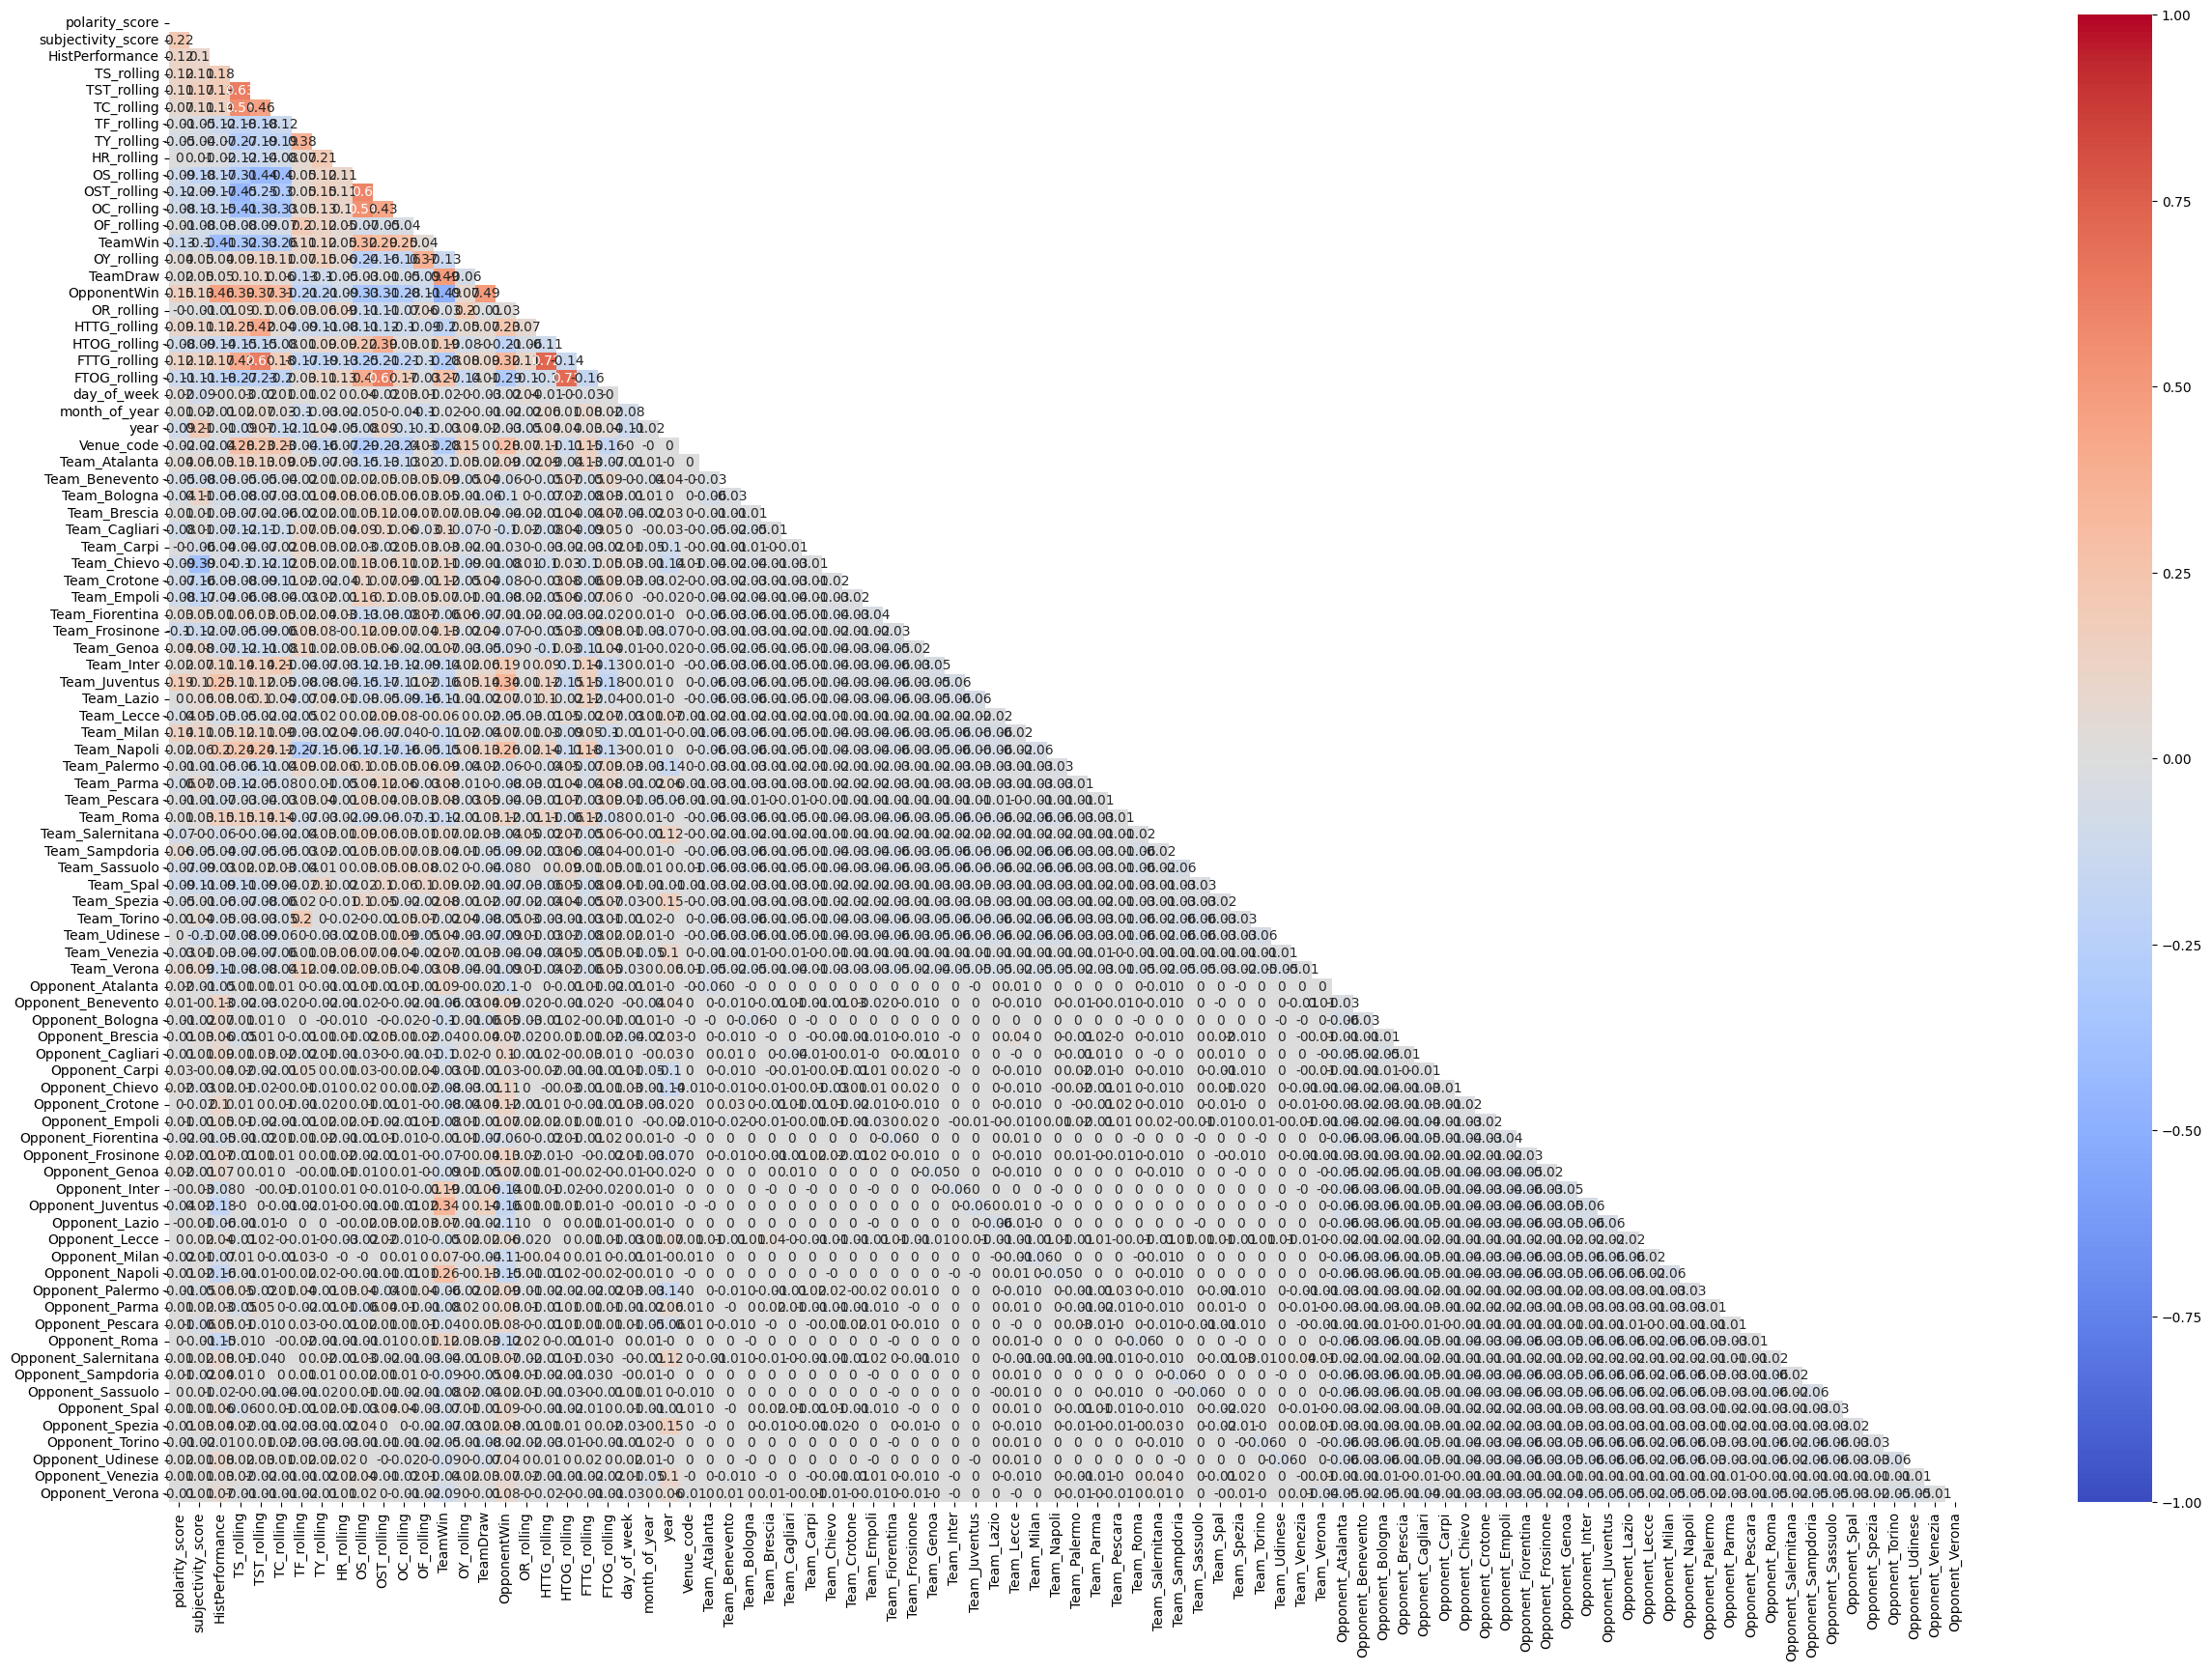

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate correlation matrix

corr_df = X.corr()

# Create a mask for upper-triangle in correlation matrix

mask = np.triu(corr_df)

# visualize the correlation in a heatmap

plt.figure(figsize = (30,20))

sns.heatmap(corr_df.round(2),annot = True,vmax = 1,vmin = -1, cmap = "coolwarm",mask = mask)

### Consideration for the heatmap
- 4 features have 0 correlations
- Drop the following columns:
    - Unnamed: 0
    - Team_Cremonese
    - Opponent_Cremonese
    - Team_Monza
    - Opponent_Cremonese

In [125]:
X.drop(['Unnamed: 0','Opponent_Monza','Opponent_Cremonese','Team_Cremonese', 'Team_Monza'], axis=1, inplace=True)
X.head()

polarity_score  subjectivity_score  HistPerformance  TS_rolling  \
378           0.509               0.983              0.0      14.000   
379           0.772               0.988              1.0      12.667   
380           0.719               0.985              0.0      13.667   
381           0.683               0.979              1.0      15.667   
382           0.833               0.982              1.0      13.333   

     TST_rolling  TC_rolling  TF_rolling  TY_rolling  HR_rolling  OS_rolling  \
378        3.000       4.667      14.000       1.333       0.667      15.000   
379        4.000       4.000      10.667       2.000       0.333      16.667   
380        5.333       6.000      11.000       2.667       0.000       8.333   
381        7.000       7.000      17.000       2.333       0.000      13.000   
382        4.000       5.333      20.333       2.667       0.000       9.333   

     OST_rolling  OC_rolling  OF_rolling  TeamWin  OY_rolling  TeamDraw  \
378        3.667       5.667      17.667    3.690       2.000      3.28   
379        5.000       7.000       9.667    2.080       3.000      3.28   
380        2.000       3.667      15.000    1.282       2.667      5.50   
381        4.667       8.667      16.667   10.700       2.333      5.50   
382        4.333       4.333      17.000    1.304       3.667      5.26   

     OpponentWin  OR_rolling  HTTG_rolling  HTOG_rolling  FTTG_rolling  \
378        2.080       0.333         0.667         0.000         1.333   
379        3.690       0.000         1.000         0.333         2.000   
380       10.700       0.333         1.000         0.333         1.333   
381        1.282       0.000         1.333         0.333         1.667   
382       10.260       0.333         0.000         0.333         0.333   

     FTOG_rolling  day_of_week  month_of_year  year  Venue_code  \
378         1.667            5              1  2016           1   
379         0.667            5              1  2016           0   
380         0.667            5              1  2016           1   
381         0.667            5              1  2016           0   
382         1.000            5              1  2016           1   

     Team_Atalanta  Team_Benevento  Team_Bologna  Team_Brescia  Team_Cagliari  \
378              1               0             0             0              0   
379              0               0             0             0              0   
380              0               0             0             0              0   
381              0               0             0             0              0   
382              0               0             0             0              0   

     Team_Carpi  Team_Chievo  Team_Crotone  Team_Empoli  Team_Fiorentina  \
378           0            0             0            0                0   
379           0            0             0            0                0   
380           0            0             0            0                0   
381           0            0             0            0                0   
382           0            0             0            0                0   

     Team_Frosinone  Team_Genoa  Team_Inter  Team_Juventus  Team_Lazio  \
378               0           0           0              0           0   
379               0           0           1              0           0   
380               0           0           0              0           0   
381               0           0           0              0           0   
382               0           0           0              0           0   

     Team_Lecce  Team_Milan  Team_Napoli  Team_Palermo  Team_Parma  \
378           0           0            0             0           0   
379           0           0            0             0           0   
380           0           0            1             0           0   
381           0           0            0             0           0   
382           0           0            0             

In [126]:
# In the model that we create, we have to increase are precision higher to 62,29% whcih represent the main
# probability of a match

(df_rolling['FTR_Binary'].value_counts()/df_rolling['FTR_Binary'].count())*100



0    62.291623
1    37.708377
Name: FTR_Binary, dtype: float64

### Splitting the data into train, validation, remainder and test
- Considerations:
    - Split the data in a way that the model predicts games from a certain date above, without training the model using predicting games in the future
    - The X_remainder and X_train are have a split of 20%
    - X_train have 75% of the X_remainder and the rest is for the X_validation

In [127]:
# Splitting the data into Test,Validation, Remainder and train sets
# Splitting the data from test to remainder, Test set will have 20% of the data

X_remainder = X[0:3788]
X_test = X[3788:]
X_train = X[0:2841]
X_validation = X[2841:3788]

y_remainder = y[0:3788]
y_test = y[3788:]
y_train = y[0:2841]
y_validation = y[2841:3788]

print(f'Shape of test set: {X_test.shape}')
print(f'Shape of validation set: {X_validation.shape}')
print(f'Shape of train set: {X_train.shape}')
print(f'Shape of train set: {X_remainder.shape}')

from sklearn.preprocessing import MinMaxScaler

# MinMax Scaler the X_train
scaler = MinMaxScaler()
scaler.fit(X_train)


X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)

Shape of test set: (951, 88)
Shape of validation set: (947, 88)
Shape of train set: (2841, 88)
Shape of train set: (3788, 88)


In [128]:
# Transform X_train and X_validation back to data frames
X_train = pd.DataFrame(X_train, columns = X.columns)
X_validation = pd.DataFrame(X_validation, columns = X.columns)

### Fitting the dataset into the models:
- The models that will be used are:
    - Logistic Regression
    - KNN
    - SVM
    - Decision Trees
    - Random Forest
    - XGBoost
    - Naive Bayes
- In each model a basic version of the model will be used to fit the X_train and calculate the Accuracy,Precision,Recall, F1 and ROC AUC for the y_validation.
- Each model will have a GridSearch in order to have a hyperparameter optimization. The models will be fit in the X_remainder and then calculate the Accuracy,Precision,Recall, F1 and ROC AUC for the y_test.

The Parameters analyzed are:
- `Accuracy`: The proportion of correctly predicted observations to the total observations. 
- `Precision`: The proportion of a model assigned to positive that are actually members of the positive class. 
- `Recall`: The proportion of the positive class the model correctly identified out of the total positives. 
- `F1`: The harmonic mean of the precision and recall scores. 
- `ROC AUC`: Value between 0 and 1 telling how much the model is capable of distinguishing between classes. A value of 0.5 indicates a random guess.

## Logistic Regression

### Base Model

In [129]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fitting the model
logreg.fit(X_train, y_train)

# Training and test scores
print(f"Train score: {logreg.score(X_train, y_train)}")

Train score: 0.7268567405843013


In [130]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, roc_auc_score
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

#Predict values based on new parameters
y_pred_acc = logreg.predict(X_validation)

# Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_validation,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_validation,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_validation,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_validation,y_pred_acc)))
print('ROC AUC Score : ' + str(roc_auc_score(y_validation,y_pred_acc)))

Accuracy Score : 0.6821541710665259
Precision Score : 0.6363636363636364
Recall Score : 0.40384615384615385
F1 Score : 0.4941176470588235
ROC AUC Score : 0.6298819105422878


## GridSearchCV

### Characteristics of the GridSearch:

- The scaler: `MinMaxScaler` (i.e. scale data between 0 and 1) or `StandardScaler` (i.e. data is centered at 0, and has a variance 1); 
- The penalty: `l1` (i.e. Lasso Regression) or `l2` (Ridge Regression).  regularization provides much greater penalties than  for large coefficients, but a smaller penalty for coefficients close to 0; 
- The Solver: `liblinear` or `lbfgs`; 
- C: from 0.001 to 1000, with steps of 10x. `C` is the inverse of the regularization strength.
- 5-fold Cross validation

In [131]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# estimators
estimators = [('scaling', MinMaxScaler()),
              ('model', LogisticRegression())]

# instantiate pipeline with the specified steps
pipe = Pipeline(estimators)

# define parameter grid
param_grid = {
              'scaling': [MinMaxScaler(), StandardScaler()],
              'model': [LogisticRegression(max_iter=1000)],
              'model__penalty': ['l1', 'l2'],
              'model__solver': ['liblinear', 'lbfgs'],
              'model__C': [0.001, 0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09 ,0.1, 1, 10, 100, 1000],
              'model__random_state': [1]}

# instantiate cross-validated grid search object with the steps and parameter grid
grid_logit = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    cv = 5,
    verbose = 2,
    n_jobs = -1
)

# fit the grid to the unprocessed training data
grid_logit.fit(X_remainder, y_remainder);

Fitting 5 folds for each of 120 candidates, totalling 600 fits


/Users/nicholasfuri/opt/anaconda3/envs/bigdata_ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicholasfuri/opt/anaconda3/envs/bigdata_ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nicholasfuri/opt/anaconda3/envs/bigdata_ml/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/nicholasfuri/opt/anaconda3/envs/bigdata_ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/nicholasfuri/opt/anaconda3/envs/bigdata_ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.

In [132]:
# Score of the Validation set
grid_logit.score(X_remainder,y_remainder)

0.7214889123548046

In [133]:
# Best hyperparameters
grid_logit.best_params_

{'model': LogisticRegression(C=0.04, max_iter=1000, penalty='l1', random_state=1,
                    solver='liblinear'),
 'model__C': 0.04,
 'model__penalty': 'l1',
 'model__random_state': 1,
 'model__solver': 'liblinear',
 'scaling': StandardScaler()}

In [134]:
grid_logit.best_estimator_.score(X_remainder,y_remainder)

0.7214889123548046

## Confusion Matrix

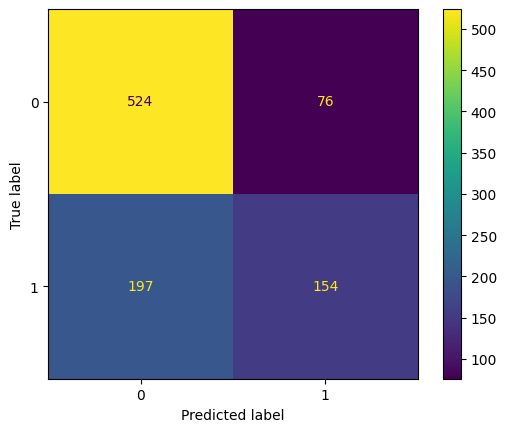

In [137]:
# Plotting theconfusion matrix
import warnings
warnings.filterwarnings('ignore')

plot_confusion_matrix(grid_logit, X_test, y_test)
plt.show()

### Test Score

In [63]:
#Predict values based on new parameters
y_pred_acc_logit = grid_logit.predict(X_test)

In [64]:
print(classification_report(y_test, y_pred_acc_logit))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79       600
           1       0.67      0.44      0.53       351

    accuracy                           0.71       951
   macro avg       0.70      0.66      0.66       951
weighted avg       0.71      0.71      0.70       951



In [65]:
# Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc_logit)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc_logit)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc_logit)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc_logit)))
print('ROC AUC Score : ' + str(roc_auc_score(y_test,y_pred_acc_logit)))

Accuracy Score : 0.7129337539432177
Precision Score : 0.6695652173913044
Recall Score : 0.43874643874643876
F1 Score : 0.5301204819277109
ROC AUC Score : 0.656039886039886


| Model | Validation Accuracy | Test Accuracy | Test Precision | Test Recall | Test F1 | Test ROC AUC
| --- | --- | --- | --- | --- | --- | --- |
| Logistic Regression | 68% | 71% | 67% | 44% | 53% | 66 %


### Consideration Logistic Regression:
- The model has a good accuracy with the test set (71%)
- Has a precision of 67% and a recall of 44%
- Overall the model is able to distinguish between classes (66% ROC AUC)

### Checking the coefficients in the Logistic Regression

coefficients  odds_ratio
OpponentWin               2.532865   12.589520
Team_Juventus             1.214078    3.367187
Opponent_Pescara          0.803394    2.233108
OY_rolling                0.789276    2.201801
Team_Lecce                0.749378    2.115683
Team_Roma                 0.705346    2.024547
Team_Napoli               0.641062    1.898496
Opponent_Frosinone        0.605793    1.832706
Opponent_Palermo          0.578427    1.783231
Opponent_Benevento        0.546237    1.726743
Opponent_Empoli           0.534365    1.706364
Team_Lazio                0.486200    1.626126
Opponent_Brescia          0.450724    1.569449
FTOG_rolling              0.418306    1.519385
Opponent_Verona           0.384330    1.468630
OST_rolling               0.375511    1.455736
Opponent_Crotone          0.375137    1.455191
Opponent_Udinese          0.344960    1.411933
Team_Inter                0.333567    1.395939
TC_rolling                0.330732    1.391987
Opponent_Genoa            0.311312    1.365214
Opponent_Bologna          0.264552    1.302847
Venue_code                0.262876    1.300665
Team_Atalanta             0.238324    1.269120
Opponent_Chievo           0.230286    1.258960
subjectivity_score        0.227183    1.255059
Team_Milan                0.221279    1.247671
TeamDraw                  0.178629    1.195577
Opponent_Spal             0.169609    1.184842
Opponent_Sampdoria        0.150934    1.162920
Team_Parma                0.142561    1.153224
Team_Benevento            0.141323    1.151797
Opponent_Cagliari         0.126211    1.134521
OF_rolling                0.098687    1.103721
Team_Crotone              0.079071    1.082282
Team_Sampdoria            0.053811    1.055285
TF_rolling                0.045481    1.046531
Team_Cagliari             0.044472    1.045476
FTTG_rolling              0.025132    1.025450
Team_Salernitana          0.000000    1.000000
Opponent_Spezia           0.000000    1.000000
Team_Venezia              0.000000    1.000000
Team_Spezia               0.000000    1.000000
Opponent_Salernitana      0.000000    1.000000
Opponent_Venezia          0.000000    1.000000
OR_rolling               -0.003909    0.996099
HTTG_rolling             -0.007768    0.992262
month_of_year            -0.017863    0.982296
Team_Torino              -0.026780    0.973576
Opponent_Sassuolo        -0.029791    0.970649
day_of_week              -0.030300    0.970154
Team_Carpi               -0.039656    0.961120
HistPerformance          -0.093649    0.910603
Team_Verona              -0.093864    0.910407
Team_Sassuolo            -0.098014    0.906636
TST_rolling              -0.143307    0.866488
Team_Udinese             -0.144006    0.865883
TY_rolling               -0.189423    0.827436
Team_Spal                -0.194393    0.823334
polarity_score           -0.206462    0.813457
Opponent_Parma           -0.209648    0.810870
Team_Fiorentina          -0.234029    0.791339
Team_Bologna             -0.249976    0.778819
Opponent_Fiorentina      -0.260815    0.770424
year                     -0.266933    0.765724
Opponent_Carpi           -0.293222    0.745857
TS_rolling               -0.335458    0.715011
Opponent_Milan           -0.338956    0.712514
Opponent_Torino          -0.346660    0.707046
Team_Chievo              -0.356025    0.700455
OC_rolling               -0.382955    0.681844
Team_Genoa               -0.389325    0.677514
Opponent_Lazio           -0.413856    0.661096
HR_rolling               -0.435983    0.646629
Opponent_Inter           -0.469053    0.625594
Opponent_Lecce           -0.483301    0.616744
Team_Palermo             -0.526233    0.590826
Opponent_Atalanta        -0.570504    0.565241
Team_Frosinone           -0.616975    0.539574
Team_Pescara             -0.627388    0.533985
Team_Empoli              -0.633556    0.530701
OS_rolling               -0.649070    0.522532
Opponent_Napoli          -0.682364    0.505421
Opponent_Roma            -0.736001    0.479026
HTOG_rolling             -0

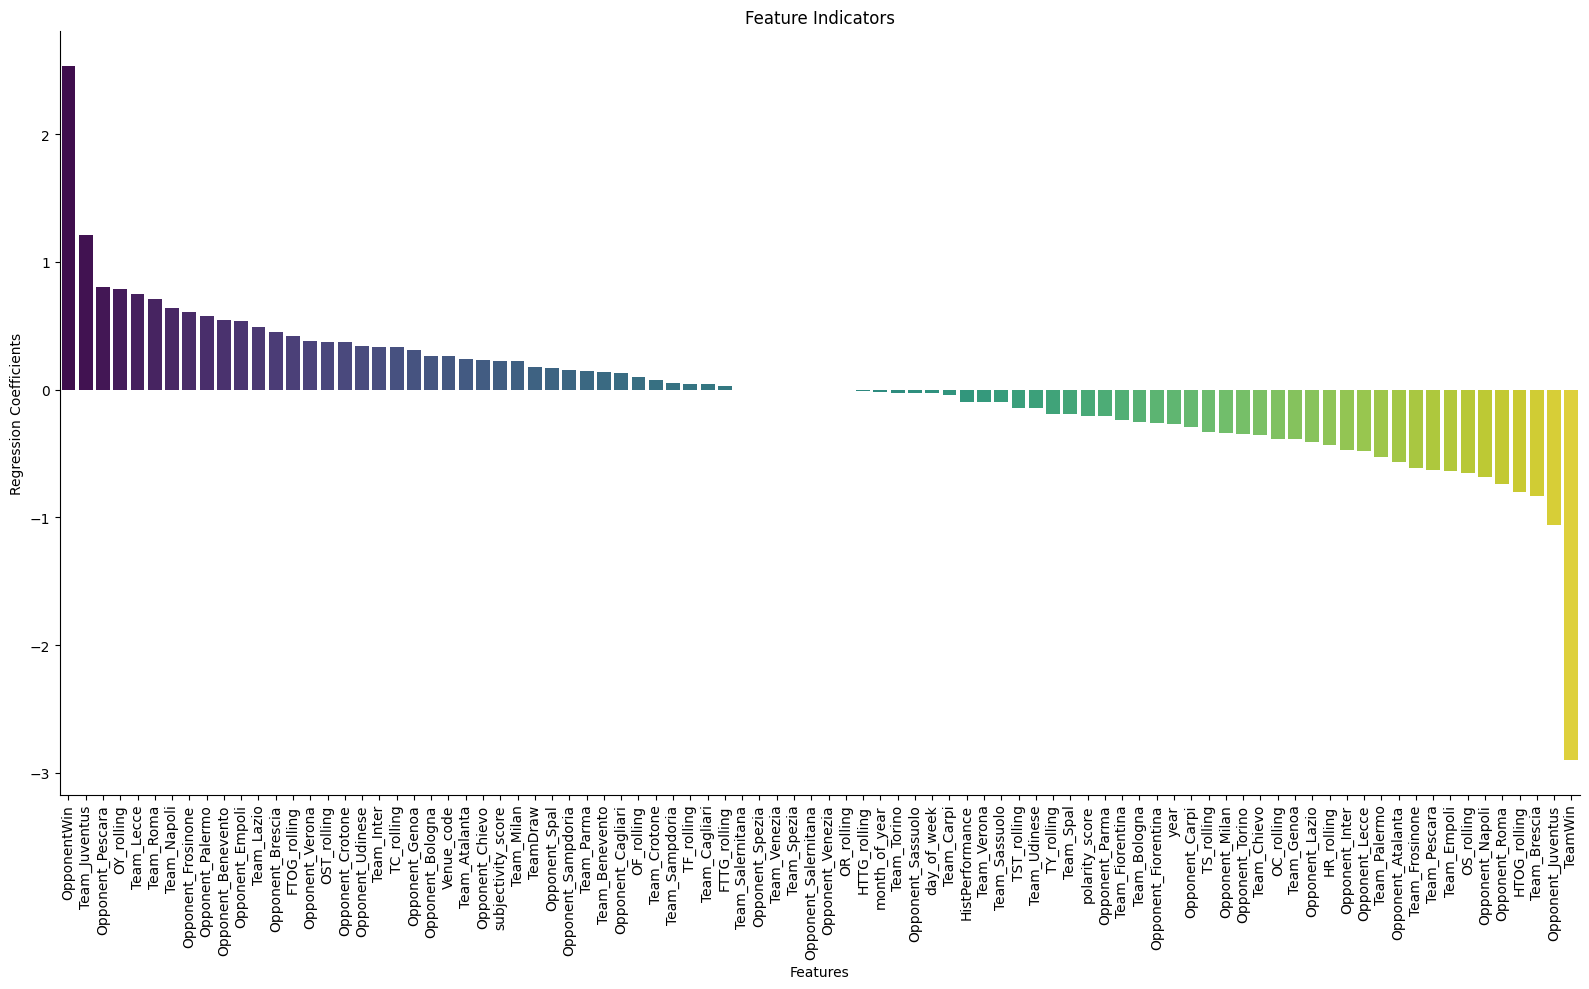

In [149]:
coef= pd.DataFrame(data={'coefficients': logreg.coef_[0],
                        'odds_ratio': np.exp(logreg.coef_[0])}, 
             index = X.columns
             ).sort_values(by='coefficients', ascending=False)

display(coef)
pd.set_option('display.max_rows', None)


plt.figure(figsize=(16, 10))
# plt.bar(coefs_odds.index, coefs_odds['coefficient'], color='r')
sns.barplot(x=coef.index, y=coef['coefficients'], palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Regression Coefficients')
plt.title('Feature Indicators')
sns.despine()
plt.tight_layout()
plt.show()

In [157]:
coef

coefficients  odds_ratio
OpponentWin               2.532865   12.589520
Team_Juventus             1.214078    3.367187
Opponent_Pescara          0.803394    2.233108
OY_rolling                0.789276    2.201801
Team_Lecce                0.749378    2.115683
Team_Roma                 0.705346    2.024547
Team_Napoli               0.641062    1.898496
Opponent_Frosinone        0.605793    1.832706
Opponent_Palermo          0.578427    1.783231
Opponent_Benevento        0.546237    1.726743
Opponent_Empoli           0.534365    1.706364
Team_Lazio                0.486200    1.626126
Opponent_Brescia          0.450724    1.569449
FTOG_rolling              0.418306    1.519385
Opponent_Verona           0.384330    1.468630
OST_rolling               0.375511    1.455736
Opponent_Crotone          0.375137    1.455191
Opponent_Udinese          0.344960    1.411933
Team_Inter                0.333567    1.395939
TC_rolling                0.330732    1.391987
Opponent_Genoa            0.311312    1.365214
Opponent_Bologna          0.264552    1.302847
Venue_code                0.262876    1.300665
Team_Atalanta             0.238324    1.269120
Opponent_Chievo           0.230286    1.258960
subjectivity_score        0.227183    1.255059
Team_Milan                0.221279    1.247671
TeamDraw                  0.178629    1.195577
Opponent_Spal             0.169609    1.184842
Opponent_Sampdoria        0.150934    1.162920
Team_Parma                0.142561    1.153224
Team_Benevento            0.141323    1.151797
Opponent_Cagliari         0.126211    1.134521
OF_rolling                0.098687    1.103721
Team_Crotone              0.079071    1.082282
Team_Sampdoria            0.053811    1.055285
TF_rolling                0.045481    1.046531
Team_Cagliari             0.044472    1.045476
FTTG_rolling              0.025132    1.025450
Team_Salernitana          0.000000    1.000000
Opponent_Spezia           0.000000    1.000000
Team_Venezia              0.000000    1.000000
Team_Spezia               0.000000    1.000000
Opponent_Salernitana      0.000000    1.000000
Opponent_Venezia          0.000000    1.000000
OR_rolling               -0.003909    0.996099
HTTG_rolling             -0.007768    0.992262
month_of_year            -0.017863    0.982296
Team_Torino              -0.026780    0.973576
Opponent_Sassuolo        -0.029791    0.970649
day_of_week              -0.030300    0.970154
Team_Carpi               -0.039656    0.961120
HistPerformance          -0.093649    0.910603
Team_Verona              -0.093864    0.910407
Team_Sassuolo            -0.098014    0.906636
TST_rolling              -0.143307    0.866488
Team_Udinese             -0.144006    0.865883
TY_rolling               -0.189423    0.827436
Team_Spal                -0.194393    0.823334
polarity_score           -0.206462    0.813457
Opponent_Parma           -0.209648    0.810870
Team_Fiorentina          -0.234029    0.791339
Team_Bologna             -0.249976    0.778819
Opponent_Fiorentina      -0.260815    0.770424
year                     -0.266933    0.765724
Opponent_Carpi           -0.293222    0.745857
TS_rolling               -0.335458    0.715011
Opponent_Milan           -0.338956    0.712514
Opponent_Torino          -0.346660    0.707046
Team_Chievo              -0.356025    0.700455
OC_rolling               -0.382955    0.681844
Team_Genoa               -0.389325    0.677514
Opponent_Lazio           -0.413856    0.661096
HR_rolling               -0.435983    0.646629
Opponent_Inter           -0.469053    0.625594
Opponent_Lecce           -0.483301    0.616744
Team_Palermo             -0.526233    0.590826
Opponent_Atalanta        -0.570504    0.565241
Team_Frosinone           -0.616975    0.539574
Team_Pescara             -0.627388    0.533985
Team_Empoli              -0.633556    0.530701
OS_rolling               -0.649070    0.522532
Opponent_Napoli          -0.682364    0.505421
Opponent_Roma            -0.736001    0.479026
HTOG_rolling             -0

### Paramters that have a high coefficient and Odds Ratio:
- The OpponentWin have both the most highest positive odds ratio, which means a higher Opponent Win odds is a good indicator to detect the team winning. That make sense. Usually the odds for a the Opponent team that play away are generely higher than the team playing at home.
- Team_juventus is has an odds ratio od 3.36, that is due to the fact that Juventus has the most wins in the league
- Opponent_Pescare, means that when teams play against Pescara are usually going to win
- A particular coefficient that have high odds is the OY_rolling (Opponent yellow cards), the higher is this coefficient the higher probability that this feature can effect positively the prediction of the team win.

## KNN Model

KNN is a classification algorithm that estimates how likely is to be a member of a specific group by looking at the labels of the data points around it (i.e. the neighbors).

#### Base Model

In [145]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the model
knn = KNeighborsClassifier()

# Fitting the model
knn.fit(X_train, y_train)

# Training and test scores
print(f"Train score: {knn.score(X_train, y_train)}")

Train score: 0.7592397043294614


In [146]:
#Predict values based on new parameters
y_pred_acc = knn.predict(X_validation)

# Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_validation,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_validation,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_validation,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_validation,y_pred_acc)))
print('ROC AUC Score : ' + str(roc_auc_score(y_validation,y_pred_acc)))

Accuracy Score : 0.6642027455121436
Precision Score : 0.5761589403973509
Recall Score : 0.47802197802197804
F1 Score : 0.5225225225225225
ROC AUC Score : 0.6292339735735962


### GridSearchCV

### Characteristics of the GridSearch:
- The scaler: MinMaxScaler or StandardScaler;
- The n_neighbors: Number of neighbors to use. From 1 to 59, with steps of 2.

In [71]:
import warnings
warnings.filterwarnings('ignore')

# estimators
estimators = [('scaling', MinMaxScaler()),
              ('model', KNeighborsClassifier())]

# instantiate pipeline with the specified steps
pipe = Pipeline(estimators)

# define parameter grid
param_grid = {
              'scaling': [MinMaxScaler(), StandardScaler()],
              'model': [KNeighborsClassifier()], 
              'model__n_neighbors': range(1, 60, 2)
}
# instantiate cross-validated grid search object with the steps and parameter grid
grid_knn = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    cv = 5,
    verbose = 2,
    n_jobs= -1
)

# fit the grid to the unprocessed training data
grid_knn.fit(X_remainder, y_remainder);

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/nicholasfuri/opt/anaconda3/envs/bigdata_ml/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/nicholasfuri/opt/anaconda3/envs/bigdata_ml/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be e

In [72]:
# Score of the Validation set
grid_knn.score(X_remainder, y_remainder)

0.7138331573389651

In [73]:
# Best hyperparameters
grid_knn.best_params_

{'model': KNeighborsClassifier(n_neighbors=43),
 'model__n_neighbors': 43,
 'scaling': StandardScaler()}

### Confusion Matrix

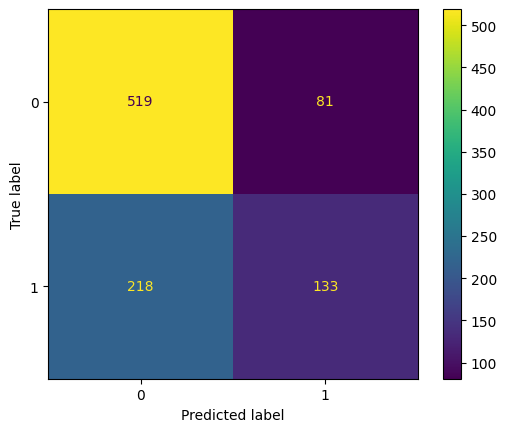

In [74]:
# Plotting theconfusion matrix
plot_confusion_matrix(grid_knn, X_test, y_test)
plt.show()

In [75]:
#Predict values based on new parameters
y_pred_acc_knn = grid_knn.predict(X_test)

In [76]:
print(classification_report(y_test,y_pred_acc_knn))

              precision    recall  f1-score   support

           0       0.70      0.86      0.78       600
           1       0.62      0.38      0.47       351

    accuracy                           0.69       951
   macro avg       0.66      0.62      0.62       951
weighted avg       0.67      0.69      0.66       951



In [77]:
# Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc_knn)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc_knn)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc_knn)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc_knn)))
print('ROC AUC Score : ' + str(roc_auc_score(y_test,y_pred_acc_knn)))

Accuracy Score : 0.6855941114616193
Precision Score : 0.6214953271028038
Recall Score : 0.3789173789173789
F1 Score : 0.47079646017699117
ROC AUC Score : 0.6219586894586895


| Model | Validation Accuracy | Test Accuracy | Test Precision | Test Recall | Test F1 | Test ROC AUC
| --- | --- | --- | --- | --- | --- | --- |
| Logistic Regression | 68% | 71% | 67% | 44% | 53% | 66 %
| KNN | 66% | 69% | 62% | 38% | 47% | 62 %

### Consideration KNN:
- The model seams to have an overall good Test Accuracy score(69%)
- Compare to the Logistic Regression, KNN perform is worst

## Support Vector Machines (SVM)

SVM is a supervised learning method that looks at data and sorts it into one of two categories. An SVM outputs a map of the sorted data with the margins between the two as far apart as possible.

#### Base Model

In [78]:
from sklearn import svm
from sklearn.svm import SVC

# Instantiate the model
svm = svm.SVC()

# Fitting the model
svm.fit(X_train, y_train)

# Training and test scores
print(f"Train score: {svm.score(X_train, y_train)}")

Train score: 0.745160154875044


In [79]:
#Predict values based on new parameters
y_pred_acc = svm.predict(X_validation)

# Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_validation,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_validation,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_validation,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_validation,y_pred_acc)))
print('ROC AUC Score : ' + str(roc_auc_score(y_validation,y_pred_acc)))

Accuracy Score : 0.6810982048574445
Precision Score : 0.6867469879518072
Recall Score : 0.3131868131868132
F1 Score : 0.430188679245283
ROC AUC Score : 0.6119964940719658


### GridSearch

### GridSearch characteristics:
- The scaler: MinMaxScaler or StandardScaler;
- The gamma: Defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected;
- The C: Trades off misclassification of training against simplicity of the decision surface.

In [80]:
from sklearn import svm
from sklearn.svm import SVC

# estimators
estimators = [('scaling', MinMaxScaler()),
              ('model', svm.SVC())]

# instantiate pipeline with the specified steps
pipe = Pipeline(estimators)

# define parameter grid
param_grid = {
              'model': [svm.SVC()], 
              'scaling': [MinMaxScaler(), StandardScaler()],
              'model__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
              'model__C': [0.001, 0.01, 0.1, 1, 10, 100]
}
# instantiate cross-validated grid search object with the steps and parameter grid
grid_svm = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    cv = 5,
    verbose = 5,
    n_jobs = -1
)

# fit the grid to the unprocessed training data
grid_svm.fit(X_remainder, y_remainder);

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [81]:
# Score of the Validation set
grid_svm.score(X_remainder, y_remainder)

0.7130411826821542

In [82]:
# Best hyperparameters
grid_svm.best_params_

{'model': SVC(C=100, gamma=0.001),
 'model__C': 100,
 'model__gamma': 0.001,
 'scaling': MinMaxScaler()}

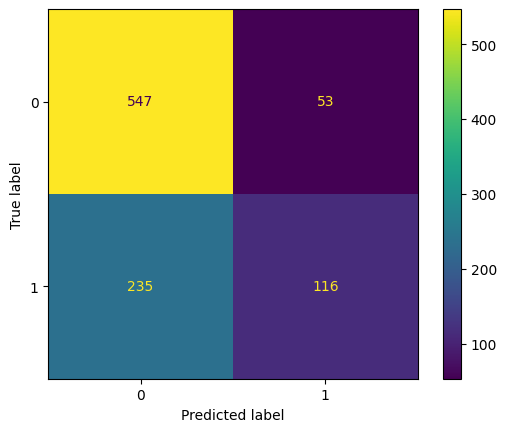

In [83]:
# Plotting theconfusion matrix
plot_confusion_matrix(grid_svm, X_test, y_test)
plt.show()

In [84]:
#Predict values based on new parameters
y_pred_acc_svm = grid_svm.predict(X_test)

In [85]:
print(classification_report(y_test,y_pred_acc_svm))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79       600
           1       0.69      0.33      0.45       351

    accuracy                           0.70       951
   macro avg       0.69      0.62      0.62       951
weighted avg       0.69      0.70      0.66       951



In [86]:
# Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc_svm)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc_svm)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc_svm)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc_svm)))
print('ROC AUC Score : ' + str(roc_auc_score(y_test,y_pred_acc_svm)))

Accuracy Score : 0.6971608832807571
Precision Score : 0.6863905325443787
Recall Score : 0.33048433048433046
F1 Score : 0.4461538461538462
ROC AUC Score : 0.6210754985754985


| Model | Validation Accuracy | Test Accuracy | Test Precision | Test Recall | Test F1 | Test ROC AUC
| --- | --- | --- | --- | --- | --- | --- |
| Logistic Regression | 68% | 71% | 67% | 44% | 53% | 66 %
| KNN | 66% | 69% | 62% | 38% | 47% | 62 %
| SVM | 68% | 70% | 69% | 33% | 45% | 62 %

### Consideration SVM:
- The model has a good Test Accuracy (70%)
- Compare to the other models, this model has a better Test Precision (69%)
- Recall decease of 11% compare to the Logistic Regression

### Decision Trees

The next model is a Decision Tree. This model works by making rules with the available features in order to best separate data points based in order to match the target.

#### Base Model

In [87]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

# Fitting the model
dt.fit(X_train, y_train)

# Training and test scores
print(f"Train score: {dt.score(X_train, y_train)}")

Train score: 1.0


In [88]:
#Predict values based on new parameters
y_pred_acc = dt.predict(X_validation)

# Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_validation,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_validation,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_validation,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_validation,y_pred_acc)))
print('ROC AUC Score : ' + str(roc_auc_score(y_validation,y_pred_acc)))

Accuracy Score : 0.5596620908130939
Precision Score : 0.42318840579710143
Recall Score : 0.4010989010989011
F1 Score : 0.4118476727785613
ROC AUC Score : 0.5298804968616289


### GridSearch

### GridSearch characteristics:
- max_depth: we limit the number of consecutive splits that can be made which will limit the number of consecutive splits that can be made. The range goes from 1 to 30
- Scaling: This model is not effected by scalling

In [89]:
# estimators
estimators = [('scaling', MinMaxScaler()),
              ('model', DecisionTreeClassifier())]

# instantiate pipeline with the specified steps
pipe = Pipeline(estimators)

# define parameter grid
param_grid = {
              'scaling': [None],
              'model': [DecisionTreeClassifier()], 
              'model__max_depth': range(1, 30),
              'model__random_state': [1]
}
# instantiate cross-validated grid search object with the steps and parameter grid
grid_dt = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    cv = 5,
    verbose = 5,
    n_jobs = -1
)

# fit the grid to the unprocessed training data
grid_dt.fit(X_remainder, y_remainder);

Fitting 5 folds for each of 29 candidates, totalling 145 fits


In [90]:
# Score of the Validation set
grid_dt.score(X_remainder, y_remainder)

0.7243928194297783

In [91]:
# Best hyperparameters
grid_dt.best_params_

{'model': DecisionTreeClassifier(max_depth=3, random_state=1),
 'model__max_depth': 3,
 'model__random_state': 1,
 'scaling': None}

#### Confusion Matrix

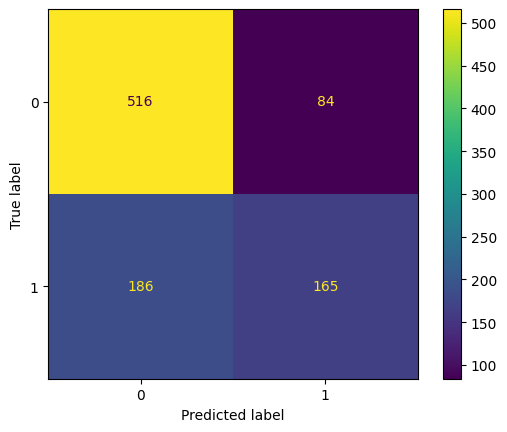

In [92]:
# Plotting theconfusion matrix
plot_confusion_matrix(grid_dt, X_test, y_test)
plt.show()

In [93]:
#Predict values based on new parameters
y_pred_acc_dt = grid_dt.predict(X_test)

In [94]:
print(classification_report(y_test,y_pred_acc_dt))

              precision    recall  f1-score   support

           0       0.74      0.86      0.79       600
           1       0.66      0.47      0.55       351

    accuracy                           0.72       951
   macro avg       0.70      0.67      0.67       951
weighted avg       0.71      0.72      0.70       951



In [95]:
# Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc_dt)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc_dt)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc_dt)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc_dt)))
print('ROC AUC Score : ' + str(roc_auc_score(y_test,y_pred_acc_dt)))

Accuracy Score : 0.7160883280757098
Precision Score : 0.6626506024096386
Recall Score : 0.4700854700854701
F1 Score : 0.55
ROC AUC Score : 0.665042735042735


| Model | Validation Accuracy | Test Accuracy | Test Precision | Test Recall | Test F1 | Test ROC AUC
| --- | --- | --- | --- | --- | --- | --- |
| Logistic Regression | 68% | 71% | 67% | 44% | 53% | 66 %
| KNN | 66% | 69% | 62% | 38% | 47% | 62 %
| SVM | 68% | 70% | 69% | 33% | 45% | 62 %
| Decision Trees | 56% | 72% | 66% | 47% | 55% | 67 %

### Consideration Decision Trees:
- The model has the best Test Accuracy of 72%
- The best Recall of 47%
- This model seam to be the best model in distinguishing between classes, ROC AUC of 67%

### Random Forest
 This is a machine learning technique for classification problems that uses ensemble learning, which is a technique that combines many classifiers (in this case, decision trees).

#### Base Model

In [96]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
rf = RandomForestClassifier()

# Fitting the model
rf.fit(X_train, y_train)

# Training and test scores
print(f"Train score: {rf.score(X_train, y_train)}")

Train score: 1.0


In [97]:
#Predict values based on new parameters
y_pred_acc = rf.predict(X_validation)

# Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_validation,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_validation,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_validation,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_validation,y_pred_acc)))
print('ROC AUC Score : ' + str(roc_auc_score(y_validation,y_pred_acc)))


Accuracy Score : 0.7138331573389651
Precision Score : 0.6631578947368421
Recall Score : 0.5192307692307693
F1 Score : 0.5824345146379045
ROC AUC Score : 0.67728262303734


### GridSearch

### GridSearch characteristics:
- Scaling: not necessary in this model
- max_depth: same as Decision trees
- n_esimators: represents the number of trees in the forest will range from 1 to 100

In [98]:
# estimators
estimators = [('scaling', MinMaxScaler()),
              ('model', RandomForestClassifier())]

# instantiate pipeline with the specified steps
pipe = Pipeline(estimators)

# define parameter grid
param_grid = {
              'scaling': [None],
              'model': [RandomForestClassifier()], 
              'model__max_depth': range(1, 10),
              'model__n_estimators': np.arange(1, 100),
              'model__random_state': [1]
}
# instantiate cross-validated grid search object with the steps and parameter grid
grid_rf = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    cv = 5,
    verbose = 5,
    n_jobs = -1
)

# fit the grid to the unprocessed training data
grid_rf.fit(X_remainder, y_remainder);

Fitting 5 folds for each of 891 candidates, totalling 4455 fits
[CV] END model=KNeighborsClassifier(), model__n_neighbors=1, scaling=MinMaxScaler(); total time=   0.3s
[CV] END model=KNeighborsClassifier(), model__n_neighbors=1, scaling=MinMaxScaler(); total time=   0.1s
[CV] END model=KNeighborsClassifier(), model__n_neighbors=1, scaling=StandardScaler(); total time=   0.1s
[CV] END model=KNeighborsClassifier(), model__n_neighbors=3, scaling=MinMaxScaler(); total time=   0.1s
[CV] END model=KNeighborsClassifier(), model__n_neighbors=3, scaling=StandardScaler(); total time=   0.2s
[CV] END model=KNeighborsClassifier(), model__n_neighbors=5, scaling=MinMaxScaler(); total time=   0.2s
[CV] END model=KNeighborsClassifier(), model__n_neighbors=5, scaling=MinMaxScaler(); total time=   0.2s
[CV] END model=KNeighborsClassifier(), model__n_neighbors=5, scaling=StandardScaler(); total time=   0.2s
[CV] END model=KNeighborsClassifier(), model__n_neighbors=7, scaling=MinMaxScaler(); total time=  

In [99]:
# Score of the Validation set
grid_rf.score(X_remainder, y_remainder)

0.8059662090813094

In [100]:
# Best hyperparameters
grid_rf.best_params_

{'model': RandomForestClassifier(max_depth=8, n_estimators=91, random_state=1),
 'model__max_depth': 8,
 'model__n_estimators': 91,
 'model__random_state': 1,
 'scaling': None}

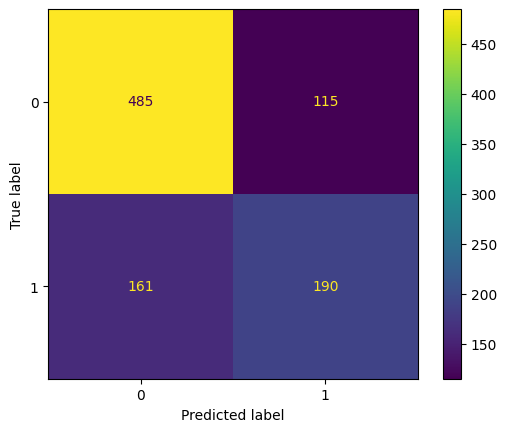

In [101]:
# Plotting theconfusion matrix
plot_confusion_matrix(grid_rf, X_test, y_test);
plt.show()

In [102]:
#Predict values based on new parameters
y_pred_acc_rf = grid_rf.predict(X_test)

In [103]:
print(classification_report(y_test,y_pred_acc_rf))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       600
           1       0.62      0.54      0.58       351

    accuracy                           0.71       951
   macro avg       0.69      0.67      0.68       951
weighted avg       0.70      0.71      0.70       951



In [104]:
# Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc_rf)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc_rf)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc_rf)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc_rf)))
print('ROC AUC Score : ' + str(roc_auc_score(y_test,y_pred_acc_rf)))

Accuracy Score : 0.7097791798107256
Precision Score : 0.6229508196721312
Recall Score : 0.5413105413105413
F1 Score : 0.5792682926829269
ROC AUC Score : 0.6748219373219374


| Model | Validation Accuracy | Test Accuracy | Test Precision | Test Recall | Test F1 | Test ROC AUC
| --- | --- | --- | --- | --- | --- | --- |
| Logistic Regression | 68% | 71% | 67% | 44% | 53% | 66 %
| KNN | 66% | 69% | 62% | 38% | 47% | 62 %
| SVM | 68% | 70% | 69% | 33% | 45% | 62 %
| Decision Trees | 56% | 72% | 66% | 47% | 55% | 67 %
| Random Forest | 71% | 71% | 62% | 54% | 58% | 67 %

### Consideration Random Forest:
- The model has an overall good test accuracy (71%) in line with the other models
- Highest test Recall (54%), which also decrease the precision to (62%)
- Highest Test F1 score of 58%, due to a good recall score

## XGBoost

The next model is the eXtreme Gradient Boosting (XGBoost) algorithm. It is an implementation of gradient boosted decision trees (i.e. an ensemble method) designed for speed and performance compared to the sci-kit learn implementation.

#### Base Model

In [114]:
from xgboost import XGBClassifier

# Instantiate the model
XGB_model = XGBClassifier()

# Fitting the model
XGB_model.fit(X_train, y_train)

# Training and test scores
print(f"Train score: {logreg.score(X_train, y_train)}")

Train score: 0.7268567405843013


In [115]:
#Predict values based on new parameters
y_pred_acc = XGB_model.predict(X_validation)

# Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_validation,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_validation,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_validation,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_validation,y_pred_acc)))
print('ROC AUC Score : ' + str(roc_auc_score(y_validation,y_pred_acc)))

Accuracy Score : 0.6747624076029567
Precision Score : 0.6157024793388429
Recall Score : 0.40934065934065933
F1 Score : 0.49174917491749176
ROC AUC Score : 0.6249104668915989


### GridSearch

### GridSearch characteristics:
- Scaling: no scaling
- max_depth: same as Decision Trees
- n_esitmators: same as Random Forest

In [116]:
# estimators
estimators = [('scaling', MinMaxScaler()),
              ('model', XGBClassifier())]

# instantiate pipeline with the specified steps
pipe = Pipeline(estimators)

# define parameter grid
param_grid = {
              'scaling': [None],
              'model': [XGBClassifier()], 
              'model__max_depth': range(1, 10),
              'model__n_estimators': np.arange(1, 200, 10),
              'model__random_state': [1]
}
# instantiate cross-validated grid search object with the steps and parameter grid
grid_xgb = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    cv = 5,
    verbose = 5,
    n_jobs = -1
)

# fit the grid to the unprocessed training data
grid_xgb.fit(X_remainder, y_remainder);

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 5/5] END model=BernoulliNB(), model__alpha=15.0, model__binarize=1.8329807108324359, scaling=StandardScaler(); total time=   0.0s
[CV 1/5] END model=BernoulliNB(), model__alpha=15.0, model__binarize=1.8329807108324359, scaling=None; total time=   0.0s
[CV 2/5] END model=BernoulliNB(), model__alpha=15.0, model__binarize=1.8329807108324359, scaling=None; total time=   0.0s
[CV 3/5] END model=BernoulliNB(), model__alpha=15.0, model__binarize=1.8329807108324359, scaling=None; total time=   0.0s
[CV 2/5] END model=BernoulliNB(), model__alpha=15.0, model__binarize=3.3598182862837818, scaling=StandardScaler(); total time=   0.0s
[CV 3/5] END model=BernoulliNB(), model__alpha=15.0, model__binarize=3.3598182862837818, scaling=StandardScaler(); total time=   0.0s
[CV 4/5] END model=BernoulliNB(), model__alpha=15.0, model__binarize=3.3598182862837818, scaling=StandardScaler(); total time=   0.0s
[CV 5/5] END model=BernoulliNB(), m

In [117]:
# Score of the Validation set
grid_xgb.score(X_remainder, y_remainder)

0.723336853220697

In [118]:
# Best hyperparameters
grid_xgb.best_params_

{'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=1, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=11, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=1, ...),
 'model__max_depth': 1,
 'model__n_estimators': 11,
 'model__random_state': 1,
 'scaling': None}

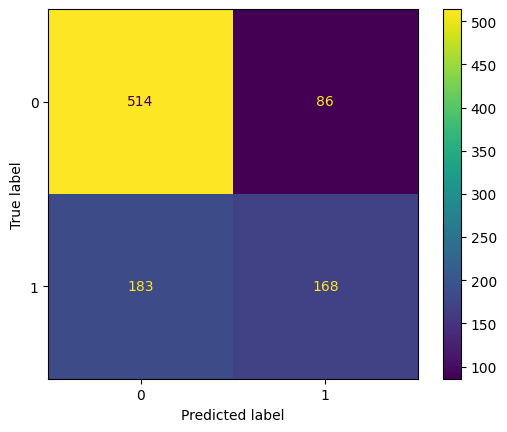

In [119]:
# Plotting theconfusion matrix
plot_confusion_matrix(grid_xgb, X_test, y_test);
plt.show()

In [120]:
#Predict values based on new parameters
y_pred_acc_xgb = grid_xgb.predict(X_test)

In [121]:
print(classification_report(y_test,y_pred_acc_xgb))

              precision    recall  f1-score   support

           0       0.74      0.86      0.79       600
           1       0.66      0.48      0.56       351

    accuracy                           0.72       951
   macro avg       0.70      0.67      0.67       951
weighted avg       0.71      0.72      0.71       951



In [140]:
# Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc_xgb)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc_xgb)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc_xgb)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc_xgb)))
print('ROC AUC Score : ' + str(roc_auc_score(y_test,y_pred_acc_xgb)))

Accuracy Score : 0.7171398527865405
Precision Score : 0.6614173228346457
Recall Score : 0.47863247863247865
F1 Score : 0.5553719008264464
ROC AUC Score : 0.6676495726495727


| Model | Validation Accuracy | Test Accuracy | Test Precision | Test Recall | Test F1 | Test ROC AUC
| --- | --- | --- | --- | --- | --- | --- |
| Logistic Regression | 68% | 71% | 67% | 44% | 53% | 66 %
| KNN | 66% | 69% | 62% | 38% | 47% | 62 %
| SVM | 68% | 70% | 69% | 33% | 45% | 62 %
| Decision Trees | 56% | 72% | 66% | 47% | 55% | 67 %
| Random Forest | 71% | 71% | 62% | 54% | 58% | 67 %
| XGBoost | 67% | 72% | 66% | 48% | 56% | 68 %

### Consideration XGBoost:
- The model have the highest Test Accuracy score togheter with the Decision Trees model (72%)
- The Precision is not the best, but at the same time is able to increase the Recall score to (48%)
- This is the model that has the highest ROC AUC score, with 68%

## Naive Bayes

Naive Bayes classifiers assume strong, or naive, independence between attributes of data points.

#### Basic Model

In [105]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Instatiate our model
nbmodel = BernoulliNB()
# Fit our model
nbmodel.fit(X_train,y_train)

# Training and test scores
print(f"Train score: {nbmodel.score(X_train, y_train)}")

Train score: 0.7113692361844421


In [106]:
#Predict values based on new parameters
y_pred_nb = nbmodel.predict(X_validation)

# Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_validation,y_pred_nb)))
print('Precision Score : ' + str(precision_score(y_validation,y_pred_nb)))
print('Recall Score : ' + str(recall_score(y_validation,y_pred_nb)))
print('F1 Score : ' + str(f1_score(y_validation,y_pred_nb)))
print('ROC AUC Score : ' + str(roc_auc_score(y_validation,y_pred_nb)))

Accuracy Score : 0.6768743400211193
Precision Score : 0.5878787878787879
Recall Score : 0.532967032967033
F1 Score : 0.5590778097982709
ROC AUC Score : 0.6498454375812865


### GridSearch

### GridSearch characteristics:
- scaling: MinMaxScaler, StandardScaler, None
- Model: BernoulliNBis designed for binary features
- model alpha: Additive (Laplace/Lidstone) smoothing parameter
- model Binarize: Threshold for binarizing (mapping to booleans) of sample features

In [107]:
from sklearn.preprocessing import Binarizer

import warnings
warnings.filterwarnings('ignore')

# estimators
estimators = [('scaling', MinMaxScaler()),
              ('model', BernoulliNB())]

# instantiate pipeline with the specified steps
pipe = Pipeline(estimators)

# define parameter grid
param_grid = {
              'scaling': [MinMaxScaler(), StandardScaler(), None],
              'model': [BernoulliNB()], 
              'model__alpha': [3.0,4.0,5.0,6.0,7.0,8.0,9.0, 10.0,15.0,16.0,17.0,18.0,19.0,20.0], 
              'model__binarize': np.logspace(0, 5, 20),
}
# instantiate cross-validated grid search object with the steps and parameter grid
grid_nb = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    cv = 5,
    verbose = 5,
    n_jobs = -1
)

# fit the grid to the unprocessed training data
grid_nb.fit(X_remainder, y_remainder);

Fitting 5 folds for each of 840 candidates, totalling 4200 fits
[CV 3/5] END model=RandomForestClassifier(), model__max_depth=7, model__n_estimators=9, model__random_state=1, scaling=None; total time=   0.1s
[CV 4/5] END model=RandomForestClassifier(), model__max_depth=7, model__n_estimators=9, model__random_state=1, scaling=None; total time=   0.1s
[CV 4/5] END model=RandomForestClassifier(), model__max_depth=7, model__n_estimators=10, model__random_state=1, scaling=None; total time=   0.1s
[CV 5/5] END model=RandomForestClassifier(), model__max_depth=7, model__n_estimators=10, model__random_state=1, scaling=None; total time=   0.1s
[CV 2/5] END model=RandomForestClassifier(), model__max_depth=7, model__n_estimators=12, model__random_state=1, scaling=None; total time=   0.1s
[CV 3/5] END model=RandomForestClassifier(), model__max_depth=7, model__n_estimators=12, model__random_state=1, scaling=None; total time=   0.1s
[CV 5/5] END model=RandomForestClassifier(), model__max_depth=7, mod

In [108]:
# Score of the Validation set
grid_nb.score(X_remainder, y_remainder)

0.7172650475184794

In [109]:
# Best hyperparameters
grid_nb.best_params_

{'model': BernoulliNB(alpha=9.0, binarize=3.3598182862837818),
 'model__alpha': 9.0,
 'model__binarize': 3.3598182862837818,
 'scaling': None}

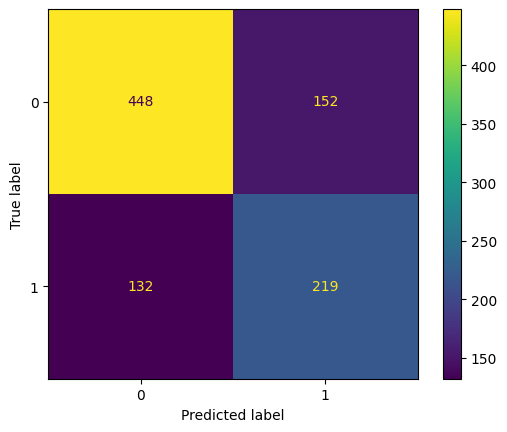

In [110]:
# Plotting theconfusion matrix
plot_confusion_matrix(grid_nb, X_test, y_test)
plt.show()# Plotting theconfusion matrix

In [111]:
#Predict values based on new parameters
y_pred_acc_nb = grid_nb.predict(X_test)

In [112]:
print(classification_report(y_test, y_pred_acc_nb))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       600
           1       0.59      0.62      0.61       351

    accuracy                           0.70       951
   macro avg       0.68      0.69      0.68       951
weighted avg       0.71      0.70      0.70       951



In [113]:
# Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc_nb)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc_nb)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc_nb)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc_nb)))
print('ROC AUC Score : ' + str(roc_auc_score(y_test,y_pred_acc_nb)))

Accuracy Score : 0.7013669821240799
Precision Score : 0.5902964959568733
Recall Score : 0.6239316239316239
F1 Score : 0.6066481994459834
ROC AUC Score : 0.6852991452991453


| Model | Validation Accuracy | Test Accuracy | Test Precision | Test Recall | Test F1 | Test ROC AUC
| --- | --- | --- | --- | --- | --- | --- |
| Logistic Regression | 68% | 71% | 67% | 44% | 53% | 66 %
| KNN | 66% | 69% | 62% | 38% | 47% | 62 %
| SVM | 68% | 70% | 69% | 33% | 45% | 62 %
| Decision Trees | 56% | 72% | 66% | 47% | 55% | 67 %
| Random Forest | 71% | 71% | 62% | 54% | 58% | 67 %
| XGBoost | 67% | 72% | 66% | 48% | 56% | 68 %
| Naive Bayes | 68% | 70% | 59% | 62% | 61% | 69 %

### Consideration Naive Bayes:
- The model has an overall good test accuracy score (70%)
- Is the model that has the highest Recall score(62%), and also the highest Test F1 score (61%)
- Seams to be the model that have the highest ability in distiguishing between classes ROC AUC test (69%)

## Final Consideration on the Models:
- The goal of this project is to identify the best model, but at the same time there isn't a better model overall.
- Betting is also a stragety, and the best models depends on what the btter is aiming for.
- If the bettor whats to have a high test Accuracy, able to detecting both Loses/Draws (outcome 0) and Wins(1). In that case all the models seam to have more or less the same score, with the best model Decision Trees (72%).
- If the bettor is aiming to have a higher Precision in identifying the wins, then the model to uses is the SVM model with a 69% score, at the same time this model has the lowest score in Recalls (33%). Another alternative could be the Logistic Regression model, which has the second best Precision score (67%) but a higher recall score (44%).
- If the bettor whats to have a model which out of the whole baskets of positive is able to identify more Wins, then the best model is Naive Bayes with a 62% Recall score. This model at the same time has a precision of 59%
- If the bettor wants a model that have the highest average of Precision and Recall score Naive Bayes has the best F1 score (69%). 